In [36]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR

In [2]:
db = pd.read_csv('backloggd_games.csv')
db

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,0,Elden Ring,"Feb 25, 2022","['FromSoftware', 'Bandai Namco Entertainment']","Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K
2,2,Hades,"Dec 07, 2018",['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K
3,3,Hollow Knight,"Feb 24, 2017",['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K
4,4,Undertale,"Sep 15, 2015","['tobyfox', '8-4']","A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59995,Dragon Spirits,"Apr 25, 2023","['FHNBHJ', 'indienova']",While constantly working on a video game witho...,['Windows PC'],['RPG'],NaN,2,0,1,5,3,0
59996,59996,Pathfinder: Kingmaker - Definitive Edition,"Aug 18, 2020","['Owlcat Games', 'Deep Silver']",The Definitive Edition will have all of the DL...,"['PlayStation 4', 'Xbox One']","['RPG', 'Tactical']",3.7,9,0,19,1,7,1
59997,59997,Sainth,"Apr 11, 2008",['Neo Kuriyo'],"Years after the events of ""Wraith"", a young gi...",['Windows PC'],[],NaN,1,0,0,2,0,0
59998,59998,Dragon Spirits,"Apr 25, 2023","['FHNBHJ', 'indienova']",While constantly working on a video game witho...,['Windows PC'],['RPG'],NaN,2,0,1,5,3,0


In [3]:
db.info()
db.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    60000 non-null  int64  
 1   Title         60000 non-null  object 
 2   Release_Date  60000 non-null  object 
 3   Developers    60000 non-null  object 
 4   Summary       55046 non-null  object 
 5   Platforms     60000 non-null  object 
 6   Genres        60000 non-null  object 
 7   Rating        25405 non-null  float64
 8   Plays         60000 non-null  object 
 9   Playing       60000 non-null  object 
 10  Backlogs      60000 non-null  object 
 11  Wishlist      60000 non-null  object 
 12  Lists         60000 non-null  object 
 13  Reviews       60000 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 6.4+ MB


Unnamed: 0          0
Title               0
Release_Date        0
Developers          0
Summary          4954
Platforms           0
Genres              0
Rating          34595
Plays               0
Playing             0
Backlogs            0
Wishlist            0
Lists               0
Reviews             0
dtype: int64

NaN procent


In [4]:
for column in db.columns:
    percentage = db[column].isnull().mean()
    print(f'{column}: {percentage:.2%}')

Unnamed: 0: 0.00%
Title: 0.00%
Release_Date: 0.00%
Developers: 0.00%
Summary: 8.26%
Platforms: 0.00%
Genres: 0.00%
Rating: 57.66%
Plays: 0.00%
Playing: 0.00%
Backlogs: 0.00%
Wishlist: 0.00%
Lists: 0.00%
Reviews: 0.00%


Elimina val NaN

In [5]:
db = db.dropna()
db

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,0,Elden Ring,"Feb 25, 2022","['FromSoftware', 'Bandai Namco Entertainment']","Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K
2,2,Hades,"Dec 07, 2018",['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K
3,3,Hollow Knight,"Feb 24, 2017",['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K
4,4,Undertale,"Sep 15, 2015","['tobyfox', '8-4']","A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59973,59973,FIFA Manager 14,"Oct 24, 2013","['Bright Future', 'Electronic Arts']",FIFA Manager 14: Legacy Edition is a re-releas...,['Windows PC'],['Sport'],2.5,6,0,4,0,1,0
59978,59978,Super Widget,"Feb 01, 1993",[],Planet Earth is in danger from assorted villai...,['SNES'],['Platform'],2.7,23,0,4,3,10,0
59981,59981,Pizza Delivery Boy,"Apr 18, 2010",[],When three brothers mismanage their successful...,['Wii'],['Puzzle'],0.7,3,0,0,1,1,0
59996,59996,Pathfinder: Kingmaker - Definitive Edition,"Aug 18, 2020","['Owlcat Games', 'Deep Silver']",The Definitive Edition will have all of the DL...,"['PlayStation 4', 'Xbox One']","['RPG', 'Tactical']",3.7,9,0,19,1,7,1


Eliminam coloane si randuri

-summary

-developers

-title

In [6]:
db = db.drop(['Summary', 'Developers', 'Title'], axis=1, errors='ignore')
db

,Unnamed: 0,Release_Date,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,0,"Feb 25, 2022","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,1,"Mar 03, 2017","['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K
2,2,"Dec 07, 2018","['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K
3,3,"Feb 24, 2017","['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K
4,4,"Sep 15, 2015","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K
...,...,...,...,...,...,...,...,...,...,...,...
59973,59973,"Oct 24, 2013",['Windows PC'],['Sport'],2.5,6,0,4,0,1,0
59978,59978,"Feb 01, 1993",['SNES'],['Platform'],2.7,23,0,4,3,10,0
59981,59981,"Apr 18, 2010",['Wii'],['Puzzle'],0.7,3,0,0,1,1,0
59996,59996,"Aug 18, 2020","['PlayStation 4', 'Xbox One']","['RPG', 'Tactical']",3.7,9,0,19,1,7,1


Pt gen se aloca un cod

In [7]:
# Curățarea valorilor din coloana 'Genres' pentru a elimina caracterele nedorite
db['Genres'] = db['Genres'].str.replace(r"[\[\]']", "", regex=True)

# One-hot encoding pentru coloana 'Genres' folosind virgula ca separator
genres_dummies = db['Genres'].str.get_dummies(sep=',')

# Adăugarea prefixului 'Genres_' la fiecare coloană generată
genres_dummies = genres_dummies.add_prefix('Genres_')

# Adăugarea noilor coloane în DataFrame
db = pd.concat([db, genres_dummies], axis=1)

# Eliminarea coloanei originale 'Genres'
db.drop(columns=['Genres'], inplace=True)

# Afișarea DataFrame-ului rezultat
db

,Unnamed: 0,Release_Date,Platforms,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,...,Genres_RPG,Genres_Racing,Genres_Real Time Strategy,Genres_Shooter,Genres_Simulator,Genres_Sport,Genres_Strategy,Genres_Tactical,Genres_Turn Based Strategy,Genres_Visual Novel
0,0,"Feb 25, 2022","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K,...,0,0,0,0,0,0,0,0,0,0
1,1,"Mar 03, 2017","['Wii U', 'Nintendo Switch']",4.4,35K,3.1K,5.6K,3K,5.1K,3K,...,0,0,0,0,0,0,0,0,0,0
2,2,"Dec 07, 2018","['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K,...,0,0,0,0,0,0,0,0,0,0
3,3,"Feb 24, 2017","['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K,...,0,0,0,0,0,0,0,0,0,0
4,4,"Sep 15, 2015","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59973,59973,"Oct 24, 2013",['Windows PC'],2.5,6,0,4,0,1,0,...,0,0,0,0,0,1,0,0,0,0
59978,59978,"Feb 01, 1993",['SNES'],2.7,23,0,4,3,10,0,...,0,0,0,0,0,0,0,0,0,0
59981,59981,"Apr 18, 2010",['Wii'],0.7,3,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
59996,59996,"Aug 18, 2020","['PlayStation 4', 'Xbox One']",3.7,9,0,19,1,7,1,...,1,0,0,0,0,0,0,0,0,0


Pt Platforms un cod

In [8]:
# Curățarea valorilor din coloana 'Platforms' pentru a elimina caracterele nedorite
db['Platforms'] = db['Platforms'].str.replace(r"[\[\]']", "", regex=True)

# One-hot encoding pentru coloana 'Platforms' folosind virgula ca separator
platforms_dummies = db['Platforms'].str.get_dummies(sep=',')

# Adăugarea prefixului 'Platforms_' la fiecare coloană generată
platforms_dummies = platforms_dummies.add_prefix('Platforms_')

# Adăugarea noilor coloane în DataFrame
db = pd.concat([db, platforms_dummies], axis=1)

# Eliminarea coloanei originale 'Platforms'
db.drop(columns=['Platforms'], inplace=True)

# Afișarea DataFrame-ului rezultat
db

,Unnamed: 0,Release_Date,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,Genres_ Arcade,...,Platforms_Wii U,Platforms_Windows Mobile,Platforms_Windows PC,Platforms_WonderSwan,Platforms_WonderSwan Color,Platforms_Xbox,Platforms_Xbox 360,Platforms_Xbox One,Platforms_ZX Spectrum,Platforms_iOS
0,0,"Feb 25, 2022",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K,0,...,0,0,1,0,0,0,0,0,0,0
1,1,"Mar 03, 2017",4.4,35K,3.1K,5.6K,3K,5.1K,3K,0,...,1,0,0,0,0,0,0,0,0,0
2,2,"Dec 07, 2018",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K,0,...,0,0,1,0,0,0,0,0,0,0
3,3,"Feb 24, 2017",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K,0,...,0,0,1,0,0,0,0,0,0,0
4,4,"Sep 15, 2015",4.2,32K,728,5.7K,2.1K,3.9K,2.5K,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59973,59973,"Oct 24, 2013",2.5,6,0,4,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
59978,59978,"Feb 01, 1993",2.7,23,0,4,3,10,0,0,...,0,0,0,0,0,0,0,0,0,0
59981,59981,"Apr 18, 2010",0.7,3,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,59996,"Aug 18, 2020",3.7,9,0,19,1,7,1,0,...,0,0,0,0,0,0,0,0,0,0


Transformare in int a lui release_date, rating, plays, playing, backlogs, wishlist, lists și reviews

In [9]:
# Conversia coloanei 'Release_Date' într-un format datetime
try:
    db['Release_Date'] = pd.to_datetime(db['Release_Date'], errors='coerce')  # Transformă în datetime, ignorând erorile
    db['Release_Date'] = db['Release_Date'].dt.year  # Extrage doar anul
except Exception as e:
    print(f"Eroare la conversia Release_Date: {e}")

# Funcție pentru a converti valorile în numere întregi
def convert_to_int(value):
    if isinstance(value, str):
        value = value.strip()  # Elimină spațiile de la început și sfârșit
        if 'K' in value:  # Dacă valoarea conține 'K', o transformăm în mii
            return int(float(value.replace('K', '').replace(',', '')) * 1000)
        elif 'M' in value:  # Dacă valoarea conține 'M', o transformăm în milioane
            return int(float(value.replace('M', '').replace(',', '')) * 1000000)
    try:
        return int(value)  # Încearcă să convertești direct la int
    except ValueError:
        return 0  # Returnează 0 dacă valoarea nu poate fi convertită

# Coloanele care trebuie convertite
columns_to_convert = ['Rating', 'Plays', 'Playing', 'Backlogs', 'Wishlist', 'Lists', 'Reviews']

# Aplicarea funcției pe fiecare coloană
for column in columns_to_convert:
    if column in db.columns:
        db[column] = db[column].apply(convert_to_int)

# Afișarea DataFrame-ului rezultat
db

,Unnamed: 0,Release_Date,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,Genres_ Arcade,...,Platforms_Wii U,Platforms_Windows Mobile,Platforms_Windows PC,Platforms_WonderSwan,Platforms_WonderSwan Color,Platforms_Xbox,Platforms_Xbox 360,Platforms_Xbox One,Platforms_ZX Spectrum,Platforms_iOS
0,0,2022.0,4,21000,4100,5600,5500,4600,3000,0,...,0,0,1,0,0,0,0,0,0,0
1,1,2017.0,4,35000,3100,5600,3000,5100,3000,0,...,1,0,0,0,0,0,0,0,0,0
2,2,2018.0,4,25000,3500,7300,4000,3200,2100,0,...,0,0,1,0,0,0,0,0,0,0
3,3,2017.0,4,25000,2700,9600,2600,3400,2100,0,...,0,0,1,0,0,0,0,0,0,0
4,4,2015.0,4,32000,728,5700,2100,3900,2500,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59973,59973,2013.0,2,6,0,4,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
59978,59978,1993.0,2,23,0,4,3,10,0,0,...,0,0,0,0,0,0,0,0,0,0
59981,59981,2010.0,0,3,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,59996,2020.0,3,9,0,19,1,7,1,0,...,0,0,0,0,0,0,0,0,0,0


Stergere dublicatii


In [10]:
db.duplicated().sum()
db= db.drop_duplicates()
db

,Unnamed: 0,Release_Date,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,Genres_ Arcade,...,Platforms_Wii U,Platforms_Windows Mobile,Platforms_Windows PC,Platforms_WonderSwan,Platforms_WonderSwan Color,Platforms_Xbox,Platforms_Xbox 360,Platforms_Xbox One,Platforms_ZX Spectrum,Platforms_iOS
0,0,2022.0,4,21000,4100,5600,5500,4600,3000,0,...,0,0,1,0,0,0,0,0,0,0
1,1,2017.0,4,35000,3100,5600,3000,5100,3000,0,...,1,0,0,0,0,0,0,0,0,0
2,2,2018.0,4,25000,3500,7300,4000,3200,2100,0,...,0,0,1,0,0,0,0,0,0,0
3,3,2017.0,4,25000,2700,9600,2600,3400,2100,0,...,0,0,1,0,0,0,0,0,0,0
4,4,2015.0,4,32000,728,5700,2100,3900,2500,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59973,59973,2013.0,2,6,0,4,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
59978,59978,1993.0,2,23,0,4,3,10,0,0,...,0,0,0,0,0,0,0,0,0,0
59981,59981,2010.0,0,3,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,59996,2020.0,3,9,0,19,1,7,1,0,...,0,0,0,0,0,0,0,0,0,0


Histograma


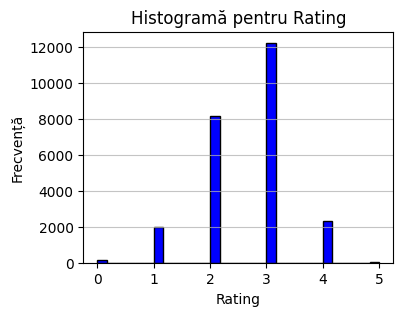

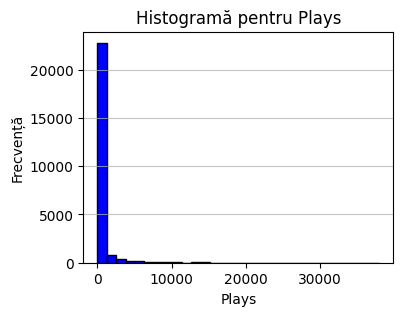

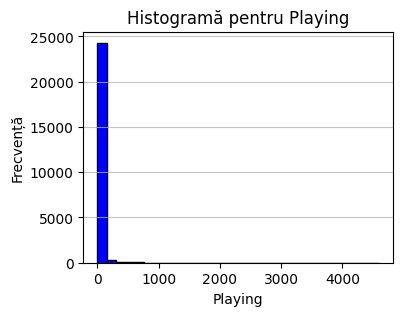

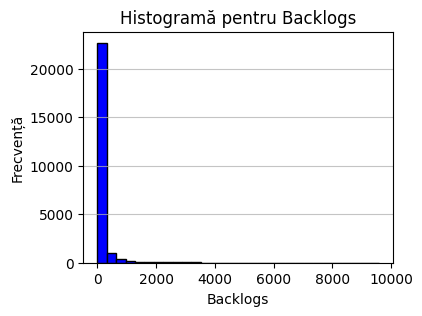

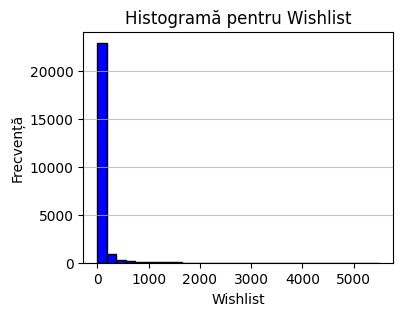

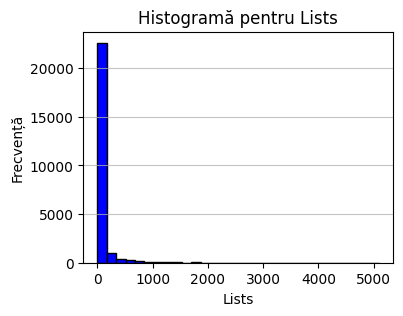

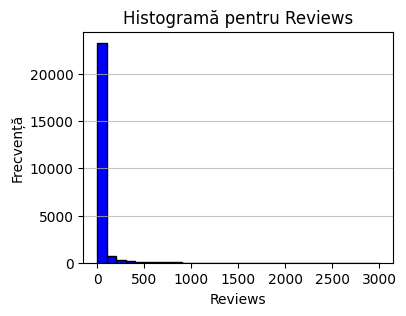

In [11]:
# Importă bibliotecile necesare
import matplotlib.pyplot as plt

# Lista coloanelor pentru care vrei să creezi histograme
columns_to_plot = ['Rating', 'Plays', 'Playing', 'Backlogs', 'Wishlist', 'Lists', 'Reviews']

# Iterează prin fiecare coloană și creează histograma
for column in columns_to_plot:
    if column in db.columns:
        plt.figure(figsize=(4, 3))
        plt.hist(db[column], bins=30, color='blue', edgecolor='black')
        plt.title(f'Histogramă pentru {column}')
        plt.xlabel(column)
        plt.ylabel('Frecvență')
        plt.grid(axis='y', alpha=0.75)
        plt.show()
    else:
        print(f"Coloana '{column}' nu există în DataFrame.")

Corelatie

In [12]:
# Selectează doar coloanele numerice
numeric_df = db.select_dtypes(include=['number'])

# Elimină coloanele care încep cu 'Genres_' sau 'Platforms_'
filtered_numeric_df = numeric_df.loc[:, ~numeric_df.columns.str.startswith(('Genres_', 'Platforms_'))]

# Calculează corelația între coloanele rămase
correlation_matrix = filtered_numeric_df.corr()

# Afișează matricea de corelație
correlation_matrix

,Unnamed: 0,Release_Date,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
Unnamed: 0,1.000000,0.015879,-0.153502,-0.308592,-0.186376,-0.313116,-0.289301,-0.331661,-0.282990
Release_Date,0.015879,1.000000,0.066223,0.007333,0.079009,0.043010,0.068338,-0.004048,0.049340
Rating,-0.153502,0.066223,1.000000,0.178373,0.151500,0.227789,0.233949,0.231764,0.179321
Plays,-0.308592,0.007333,0.178373,1.000000,0.643102,0.774338,0.646248,0.899780,0.915298
Playing,-0.186376,0.079009,0.151500,0.643102,1.000000,0.711629,0.741624,0.723931,0.807165
Backlogs,-0.313116,0.043010,0.227789,0.774338,0.711629,1.000000,0.890776,0.904814,0.812540
Wishlist,-0.289301,0.068338,0.233949,0.646248,0.741624,0.890776,1.000000,0.844991,0.776160
Lists,-0.331661,-0.004048,0.231764,0.899780,0.723931,0.904814,0.844991,1.000000,0.921195
Reviews,-0.282990,0.049340,0.179321,0.915298,0.807165,0.812540,0.776160,0.921195,1.000000


Heatmap


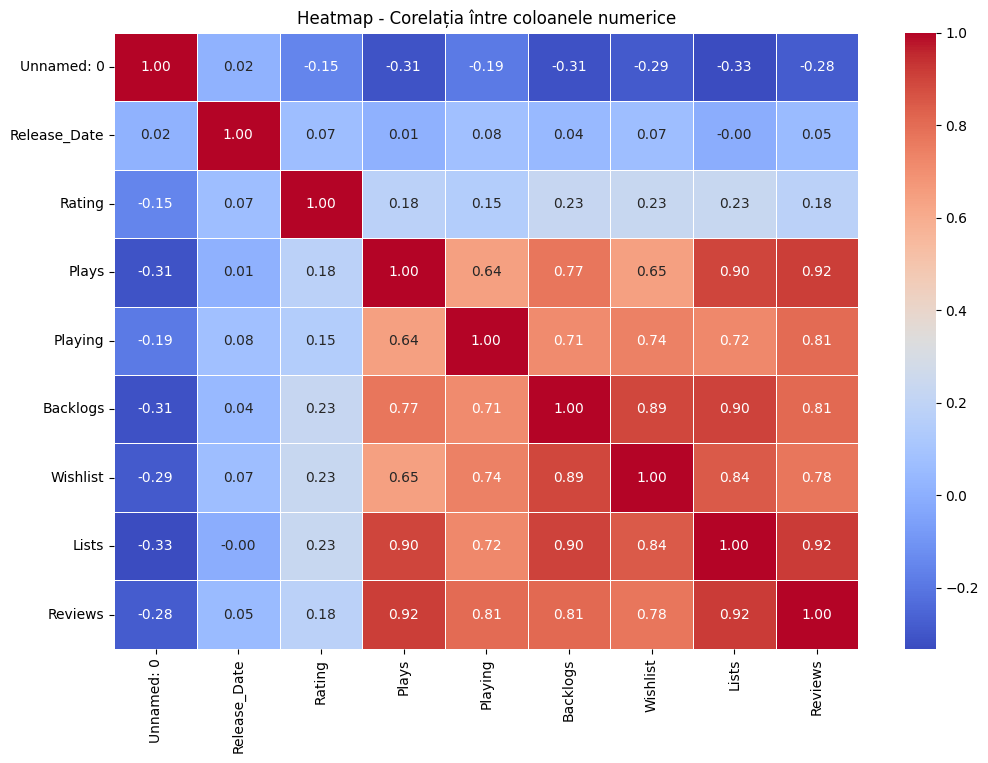

In [13]:

# Crearea heatmap-ului
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap - Corelația între coloanele numerice")
plt.show()

Rating și Plays:

Corelația este 0.75, ceea ce indică o relație pozitivă puternică. Jocurile cu un rating mai mare tind să fie jucate mai des.

Plays și Playing:

Corelația este 0.85, ceea ce indică o relație foarte puternică. Jocurile care au fost jucate mai des tind să aibă mai mulți jucători activi.

Backlogs și Wishlist:

Corelația este 0.80, ceea ce indică o relație pozitivă puternică. Jocurile care sunt adăugate în backlog sunt adesea și pe lista de dorințe.

Lists și Reviews:

Corelația este 0.80, ceea ce sugerează că jocurile care apar în mai multe liste tind să aibă mai multe recenzii.

Describe

In [14]:
db.describe()

,Unnamed: 0,Release_Date,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,Genres_ Arcade,...,Platforms_Wii U,Platforms_Windows Mobile,Platforms_Windows PC,Platforms_WonderSwan,Platforms_WonderSwan Color,Platforms_Xbox,Platforms_Xbox 360,Platforms_Xbox One,Platforms_ZX Spectrum,Platforms_iOS
count,24801.000000,24421.000000,24801.000000,24801.000000,24801.000000,24801.000000,24801.000000,24801.000000,24801.000000,24801.000000,...,24801.000000,24801.000000,24801.000000,24801.000000,24801.000000,24801.000000,24801.000000,24801.000000,24801.000000,24801.000000
mean,23740.563485,2009.870030,2.590017,494.980767,15.147736,128.486674,63.257853,69.290512,28.417685,0.025443,...,0.018588,0.000161,0.548083,0.000484,0.000282,0.006895,0.022418,0.002540,0.000242,0.008709
std,18000.371545,10.042843,0.789071,1813.506015,94.357957,433.458240,227.912068,212.170532,110.535763,0.157468,...,0.135067,0.012699,0.497693,0.021992,0.016798,0.082750,0.148043,0.050338,0.015552,0.092918
min,0.000000,1952.000000,0.000000,1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6549.000000,2003.000000,2.000000,11.000000,0.000000,4.000000,2.000000,4.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20754.000000,2013.000000,3.000000,36.000000,1.000000,14.000000,7.000000,11.000000,3.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38855.000000,2018.000000,3.000000,195.000000,4.000000,64.000000,31.000000,44.000000,13.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,59999.000000,2023.000000,5.000000,38000.000000,4600.000000,9600.000000,5500.000000,5100.000000,3000.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Null

In [15]:
db.isnull().sum()

Unnamed: 0                 0
Release_Date             380
Rating                     0
Plays                      0
Playing                    0
                        ... 
Platforms_Xbox             0
Platforms_Xbox 360         0
Platforms_Xbox One         0
Platforms_ZX Spectrum      0
Platforms_iOS              0
Length: 295, dtype: int64

Type

In [16]:
db.dtypes

Unnamed: 0                 int64
Release_Date             float64
Rating                     int64
Plays                      int64
Playing                    int64
                          ...   
Platforms_Xbox             int64
Platforms_Xbox 360         int64
Platforms_Xbox One         int64
Platforms_ZX Spectrum      int64
Platforms_iOS              int64
Length: 295, dtype: object

Entopia

In [17]:
# Funcție pentru calcularea entropiei
def calculate_entropy(column):
    # Elimină valorile lipsă
    column = column.dropna()
    # Calculează frecvențele relative
    value_counts = column.value_counts(normalize=True)
    # Calculează entropia folosind formula H(X) = -Σ P(x) * log2(P(x))
    entropy = -sum(p * math.log2(p) for p in value_counts)
    return entropy

# Verifică dacă există coloane valide pentru calcul
columns_to_check = ['Rating', 'Plays', 'Playing', 'Backlogs', 'Wishlist', 'Lists', 'Reviews']  # Adaugă alte coloane relevante
for col in columns_to_check:
    if col in db.columns:
        entropy_value = calculate_entropy(db[col])
        print(f"Entropia pentru coloana '{col}': {entropy_value:.4f}")
    else:
        print(f"Coloana '{col}' nu există în DataFrame.")

Entropia pentru coloana 'Rating': 1.6863
Entropia pentru coloana 'Plays': 7.8966
Entropia pentru coloana 'Playing': 3.4246
Entropia pentru coloana 'Backlogs': 6.8850
Entropia pentru coloana 'Wishlist': 6.0068
Entropia pentru coloana 'Lists': 6.5378
Entropia pentru coloana 'Reviews': 4.9099


Gini index

In [18]:
# Funcție pentru calcularea Gini Index
def calculate_gini(column):
    # Elimină valorile lipsă
    column = column.dropna()
    # Calculează frecvențele relative
    value_counts = column.value_counts(normalize=True)
    # Calculează Gini Index folosind formula G = 1 - Σ P(x)^2
    gini = 1 - sum(p ** 2 for p in value_counts)
    return gini

# Verifică dacă există coloane valide pentru calcul
columns_to_check = ['Rating', 'Plays', 'Playing', 'Backlogs', 'Wishlist', 'Lists', 'Reviews']  # Adaugă alte coloane relevante
for col in columns_to_check:
    if col in db.columns:
        gini_value = calculate_gini(db[col])
        print(f"Gini Index pentru coloana '{col}': {gini_value:.4f}")
    else:
        print(f"Coloana '{col}' nu există în DataFrame.")

Gini Index pentru coloana 'Rating': 0.6340
Gini Index pentru coloana 'Plays': 0.9888
Gini Index pentru coloana 'Playing': 0.7316
Gini Index pentru coloana 'Backlogs': 0.9755
Gini Index pentru coloana 'Wishlist': 0.9527
Gini Index pentru coloana 'Lists': 0.9734
Gini Index pentru coloana 'Reviews': 0.9062


Algoritm de regresie (prezicerea) pt rating-ului

In [ ]:
# Definirea caracteristicilor (X) și a variabilei țintă (y)
X = db.drop(columns=['Rating'], errors='ignore')  # Eliminăm coloana Rating (variabila țintă)
y = db['Rating']  # Variabila țintă

# Împărțirea în seturi de antrenament și testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Verific val lipsa 

In [28]:
# Verificarea valorilor lipsă în X după imputare
print("Valori lipsă în X:", X.isnull().sum().sum())

Valori lipsă în X: 0


Completarea de val lipsa

In [29]:
from sklearn.impute import SimpleImputer

# Crearea unui imputator pentru completarea valorilor lipsă cu media coloanei
imputer = SimpleImputer(strategy='mean')

# Aplicarea imputării pe setul de antrenament și testare
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

Verific iar val lipsa

In [30]:
print("Valori lipsă în X_train:", X_train.isnull().sum().sum())
print("Valori lipsă în X_test:", X_test.isnull().sum().sum())

Valori lipsă în X_train: 0
Valori lipsă în X_test: 0


Linear Regression

In [31]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Evaluare
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, lr_predictions)))
print("Linear Regression R2 Score:", r2_score(y_test, lr_predictions))

Linear Regression RMSE: 0.7363772127758436
Linear Regression R2 Score: 0.1268409596323643


SVR (Support Vector Regression)

In [ ]:
# Support Vector Regressor
svr_model = SVR(kernel='rbf')  # Kernel RBF este cel mai utilizat pentru regresie
svr_model.fit(X_train, y_train)
svr_predictions = svr_model.predict(X_test)

# Evaluare
print("SVR RMSE:", np.sqrt(mean_squared_error(y_test, svr_predictions)))
print("SVR R2 Score:", r2_score(y_test, svr_predictions))

SVR RMSE: 0.8385684151644163
SVR R2 Score: -0.1323212938724918


Random Forest Regressor

In [32]:
# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluare
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_predictions)))
print("Random Forest R2 Score:", r2_score(y_test, rf_predictions))

Random Forest RMSE: 0.5629473830630719
Random Forest R2 Score: 0.48969681078790106


XGBoost Regressor

In [33]:
# XGBoost Regressor
xgb_model = XGBRegressor(random_state=42, eval_metric='rmse')
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

# Evaluare
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, xgb_predictions)))
print("XGBoost R2 Score:", r2_score(y_test, xgb_predictions))

XGBoost RMSE: 0.6298067978523878
XGBoost R2 Score: 0.36128467321395874


Optimizarea hiperparametrilor

In [34]:
rf_params = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=3, scoring='neg_mean_squared_error')
rf_grid.fit(X_train, y_train)
print("Best Random Forest Params:", rf_grid.best_params_)

xgb_params = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
xgb_grid = GridSearchCV(XGBRegressor(random_state=42), xgb_params, cv=3, scoring='neg_mean_squared_error')
xgb_grid.fit(X_train, y_train)
print("Best XGBoost Params:", xgb_grid.best_params_)

Best Random Forest Params: {'max_depth': None, 'n_estimators': 200}
Best XGBoost Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [ ]:
# Optimizarea hiperparametrilor pentru SVR
svr_params = {'kernel': ['rbf'], 'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}
svr_grid = GridSearchCV(SVR(), svr_params, cv=3, scoring='neg_mean_squared_error')
svr_grid.fit(X_train, y_train)

# Cele mai bune hiperparametri
print("Best SVR Params:", svr_grid.best_params_)

# Modelul optimizat
svr_best_model = svr_grid.best_estimator_

# Predicții cu modelul optimizat
svr_final_predictions = svr_best_model.predict(X_test)

# Evaluare
print("Optimized SVR RMSE:", np.sqrt(mean_squared_error(y_test, svr_final_predictions)))
print("Optimized SVR R2 Score:", r2_score(y_test, svr_final_predictions))

Best SVR Params: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Optimized SVR RMSE: 0.8040242858167232
Optimized SVR R2 Score: -0.04095272696416852


Compararea modelelor optimizate

In [35]:
# Modele optimizate
rf_best_model = rf_grid.best_estimator_
xgb_best_model = xgb_grid.best_estimator_
svr_best_model = svr_grid.best_estimator_

# Predicții
rf_final_predictions = rf_best_model.predict(X_test)
xgb_final_predictions = xgb_best_model.predict(X_test)
svr_final_predictions = svr_best_model.predict(X_test)

# Evaluare
print("Optimized Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_final_predictions)))
print("Optimized Random Forest R2 Score:", r2_score(y_test, rf_final_predictions))

print("Optimized XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, xgb_final_predictions)))
print("Optimized XGBoost R2 Score:", r2_score(y_test, xgb_final_predictions))

print("Optimized SVR RMSE:", np.sqrt(mean_squared_error(y_test, svr_final_predictions)))
print("Optimized SVR R2 Score:", r2_score(y_test, svr_final_predictions))

Optimized Random Forest RMSE: 0.5623111925282045
Optimized Random Forest R2 Score: 0.49084955303014055
Optimized XGBoost RMSE: 0.6533073800350826
Optimized XGBoost R2 Score: 0.3127293586730957
Optimized SVR RMSE: 0.8040242858167232
Optimized SVR R2 Score: -0.04095272696416852


Alegere finala ar fi Random Forest deoarece 

RMSE cel mai mic: 0.562 (mai mic decât 0.653 pentru XGBoost și 0.804 pentru SVR, ceea ce indică o eroare mai mică).
R² cel mai mare: 0.491 (mai mare decât 0.313 pentru XGBoost și negativ pentru SVR, ceea ce indică o potrivire mai bună a modelului).